In [8]:
from google.colab import files 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
#carga del archivo
uploaded = files.upload()

Saving coches-segunda-mano.csv to coches-segunda-mano (1).csv


In [10]:
coches= pd.read_csv('coches-segunda-mano.csv')
coches.head()

,Unnamed: 0,url,company,make,model,version,price,price_financed,fuel,year,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
1,4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00
2,5,f15e9a256de698bf0588753e7add0fdf,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,10490.0,Gasolina,2016.0,...,5,Manual,Blanco,32,True,Flexicar Rivas,Madrid,Spain,2021-01-08 17:03:33,2021-01-15 00:00:00
3,6,517b8f7c488d9d4645f76b1611418a4e,9881bcdd5a0ad4733037b3fb25e69c3a,LAND-ROVER,Discovery Sport,LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...,28500,26220.0,Diésel,2017.0,...,5,Automático,Blanco,47,True,OK Cars,Baleares,Spain,2021-01-12 11:26:18,2021-01-15 00:00:00
4,10,24493d316fdbd736dab7162c09f9d582,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,Berlingo,CITROEN Berlingo Multispace 20 Aniv.BlueHDi 74...,13900,12900.0,Diésel,2017.0,...,5,Manual,Gris / Plata,21,True,Automóviles Emilio,Murcia,Spain,2021-01-07 19:22:08,2021-01-15 00:00:00


In [11]:
#cantidad de datos faltantes por columna
miss_values_count = coches.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)

make       2
fuel      20
year       2
power    121
shift     29
color     87
dtype: int64


In [12]:
# informacion de la base de datos
coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23563 entries, 0 to 23562
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23563 non-null  int64  
 1   url              23563 non-null  object 
 2   company          23563 non-null  object 
 3   make             23561 non-null  object 
 4   model            23563 non-null  object 
 5   version          23563 non-null  object 
 6   price            23563 non-null  int64  
 7   price_financed   23563 non-null  float64
 8   fuel             23543 non-null  object 
 9   year             23561 non-null  float64
 10  kms              23563 non-null  int64  
 11  power            23442 non-null  float64
 12  doors            23563 non-null  int64  
 13  shift            23534 non-null  object 
 14  color            23476 non-null  object 
 15  photos           23563 non-null  int64  
 16  is_professional  23563 non-null  bool   
 17  dealer      

In [13]:
# eliminamos las columnas url y company para facilitar nuestro analisis
coches.drop(['url', 'company',], axis=1)

,Unnamed: 0,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
1,4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00
2,5,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,10490.0,Gasolina,2016.0,78665,130.0,5,Manual,Blanco,32,True,Flexicar Rivas,Madrid,Spain,2021-01-08 17:03:33,2021-01-15 00:00:00
3,6,LAND-ROVER,Discovery Sport,LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...,28500,26220.0,Diésel,2017.0,36238,150.0,5,Automático,Blanco,47,True,OK Cars,Baleares,Spain,2021-01-12 11:26:18,2021-01-15 00:00:00
4,10,CITROEN,Berlingo,CITROEN Berlingo Multispace 20 Aniv.BlueHDi 74...,13900,12900.0,Diésel,2017.0,81000,100.0,5,Manual,Gris / Plata,21,True,Automóviles Emilio,Murcia,Spain,2021-01-07 19:22:08,2021-01-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23558,49993,SEAT,León,SEAT Leon ST 1.8 TSI 132kW 180CV StSp FR Plus 5p.,19490,18490.0,Gasolina,2017.0,67900,180.0,5,Manual,Blanco,34,True,Flexicar Barcelona,Barcelona,Spain,2020-12-23 19:53:58,2021-01-15 00:00:00
23559,49994,SEAT,León,SEAT Leon ST 1.6 TDI 85kW 115CV StSp Style Ed 5p.,18590,16590.0,Diésel,2019.0,21153,115.0,5,Manual,Gris / Plata,20,True,Das Weltauto Gil Automocion,Madrid,Spain,2021-01-14 19:20:40,2021-01-15 00:00:00
23560,49995,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,16490.0,Gasolina,2018.0,47000,140.0,5,Automático,Gris / Plata,26,True,Flexicar Málaga,Málaga,Spain,2020-11-24 19:59:52,2021-01-15 00:00:00
23561,49996,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,13551.0,Diésel,2015.0,68750,150.0,2,Manual,KNG Gris Casiopea (metalizado),30,True,Ocasion Plus,Málaga,Spain,2021-01-13 17:02:41,2021-01-15 00:00:00


In [14]:
# eliminamos los campos donde no tenian make(marca del carro), y año del carro ya que eran muy pocos
# y no afectan nuestro analisis
coches.dropna(subset=["make"],axis=0,inplace=True)
coches.dropna(subset=["year"],axis=0,inplace=True)
# reseteamos la base de datos
coches.reset_index(drop=True, inplace=True)

In [15]:
coches['fuel'].value_counts()

Diésel                13333
Gasolina               8233
Híbrido                 917
Eléctrico               464
Híbrido enchufable      423
Gas licuado (GLP)        98
Gas natural (CNG)        71
Name: fuel, dtype: int64

In [16]:
# remplazamos los datos faltantes en fuel por no definido
coches['fuel'].replace(np.nan, "No definido", inplace=True)

In [17]:
#remplzamos los datos faltantes en power por la media
media_power = coches['power'].mean()
print(media_power)

141.42883351821828


In [18]:
coches['power'].replace(np.nan, "140.0", inplace=True)

In [32]:
coches['shift'].value_counts()


Manual        15261
Automático     8298
Name: shift, dtype: int64

In [20]:
#Remplazamos los datos faltantes en shift por el valor que mas se repite
coches['shift'].replace(np.nan, "Manual", inplace=True)

In [21]:
coches['color'].replace(np.nan, "No definido", inplace=True)

In [22]:
coches.dropna(subset=["make"], axis=0, inplace= True)
coches.dropna(subset=["year"], axis=0, inplace= True)

In [23]:
# ya se eliminaron todos los nulos
miss_values_count = coches.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)

Series([], dtype: int64)


In [24]:
coches.dtypes

Unnamed: 0           int64
url                 object
company             object
make                object
model               object
version             object
price                int64
price_financed     float64
fuel                object
year               float64
kms                  int64
power               object
doors                int64
shift               object
color               object
photos               int64
is_professional       bool
dealer              object
province            object
country             object
publish_date        object
insert_date         object
dtype: object

In [25]:
# media, valor maximo, valor minimo quartiles .. por cada campo
coches.describe()

,Unnamed: 0,price,price_financed,year,kms,doors,photos
count,23559.000000,23559.000000,23559.000000,23559.000000,23559.000000,23559.000000,23559.000000
mean,25137.565983,19807.299546,18480.454349,2016.684876,64334.775627,4.685683,22.332102
std,14462.371935,13842.742345,13390.863171,3.250216,58957.113314,0.696049,12.178808
min,2.000000,700.000000,700.000000,1990.000000,0.000000,2.000000,0.000000
25%,12515.500000,11750.000000,10790.000000,2016.000000,14199.000000,5.000000,13.000000
50%,25308.000000,16900.000000,15500.000000,2017.000000,51866.000000,5.000000,20.000000
75%,37714.000000,23900.000000,21995.000000,2019.000000,99900.000000,5.000000,30.000000
max,49997.000000,429999.000000,428999.000000,2021.000000,485000.000000,5.000000,54.000000


In [26]:
# la correlacion en cuanto al precio, como podemos ver al año del vehiculo, su fuerza y kms son los factores que mas afectan el precio del vehiculo, negativa y positivamente
# entre mas kms tenga disminuye su precio, pero entre el año del vehiculo sea mayor y su fuerza mayor  es su precio
coches.corr()['price']

Unnamed: 0        -0.017037
price              1.000000
price_financed     0.997206
year               0.354294
kms               -0.350034
doors             -0.042340
photos             0.087105
is_professional         NaN
Name: price, dtype: float64

In [27]:
coches.corr()

,Unnamed: 0,price,price_financed,year,kms,doors,photos,is_professional
Unnamed: 0,1.000000,-0.017037,-0.017629,0.001654,-0.007852,0.003909,0.005628,NaN
price,-0.017037,1.000000,0.997206,0.354294,-0.350034,-0.042340,0.087105,NaN
price_financed,-0.017629,0.997206,1.000000,0.329941,-0.326399,-0.050938,0.085663,NaN
year,0.001654,0.354294,0.329941,1.000000,-0.767094,0.191020,-0.042912,NaN
kms,-0.007852,-0.350034,-0.326399,-0.767094,1.000000,-0.107789,0.076994,NaN
doors,0.003909,-0.042340,-0.050938,0.191020,-0.107789,1.000000,-0.004661,NaN
photos,0.005628,0.087105,0.085663,-0.042912,0.076994,-0.004661,1.000000,NaN
is_professional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


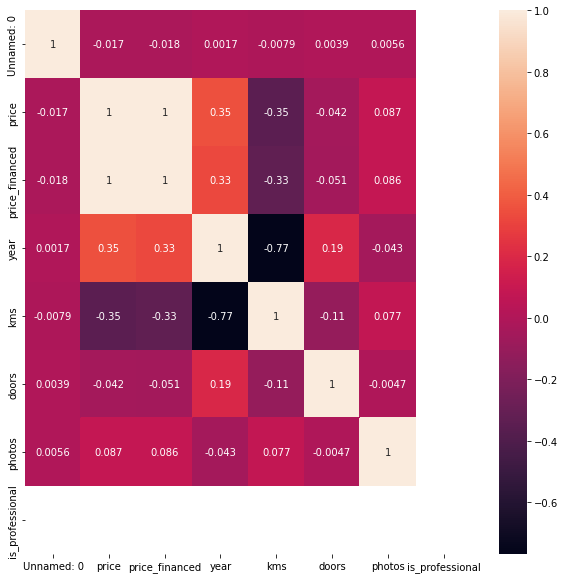

In [28]:
# grafica de la correlacion
plt.figure(figsize=(10,10))
sns.heatmap(coches.corr(),annot=True)
plt.show()

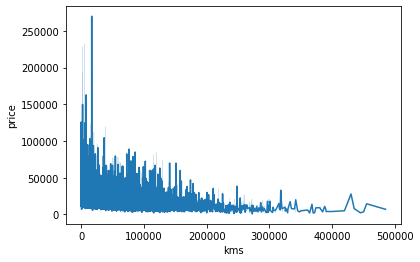

In [33]:
sns.lineplot(data=coches, x="kms", y="price")



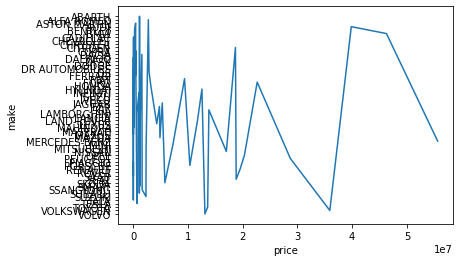

In [35]:
df2 = coches.groupby('make').sum()
df2
sns.lineplot(data=df2, x="price", y="make")
